In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy import linalg as LA

In [130]:
# 1. Загрузите данные close_prices.csv. 
# В этом файле приведены цены акций 30 компаний на закрытии торгов за каждый день периода.

data = pd.read_csv('close_prices.csv'); 

In [131]:
# 2. На загруженных данных обучите преобразование PCA с числом компоненты равным 10. 
# Скольких компонент хватит, чтобы объяснить 90% дисперсии?

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X = data.iloc[:, 1:]
pca.fit(X)

disp_explained_components = pca.explained_variance_ratio_

dspr = 0
answ = 1

while(dspr<=0.9):
    dspr+=disp_explained_components[answ-1]
    answ+=1

print(answ)

# 3. Примените построенное преобразование к исходным данным и возьмите значения первой компоненты.

pcaX = pca.transform(X)
c1 = pcaX[:, 0]

# 4. Загрузите информацию об индексе Доу-Джонса из файла djia_prices.csv. 
# Чему равна корреляция Пирсона между первой компонентой и индексом Доу-Джонса?

djia = pd.read_csv('djia_index.csv'); 
np.corrcoef(djia['^DJI'], c1, rowvar = False)


5


array([[1.        , 0.90965222],
       [0.90965222, 1.        ]])

In [134]:
# 5. Какая компания имеет наибольший вес в первой компоненте?

amx = pca.components_[0].argmax()

companies = data.columns[1:]

companies[amx]



'V'

In [135]:
amx = pca.components_.mean(axis = 0).argmax()

companies = data.columns[1:]

companies[amx]

'HD'

In [133]:
companies

Index(['AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS', 'HD', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
       'PG', 'T', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'],
      dtype='object')

<AxesSubplot:>

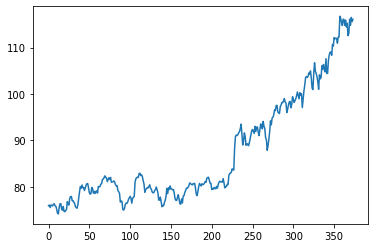

In [137]:
data['HD'].plot()

<AxesSubplot:>

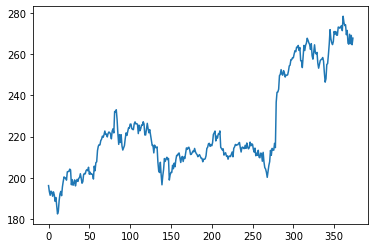

In [138]:
data['V'].plot()